In [29]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Спрятать или показать исходный код."></form>''')

In [30]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt

In [31]:
N = int(input("Сколько случайных чисел сгенирировать?(20)") or "20")
min = int(input("Максимальное значение?(0)") or 0)
max = int(input("Максимальное значение?(1)") or 1)
mode = (input("Генерировать рациональные числа вместо целых?(да)") or "да").lower()[0]
m = math.floor(1 + 3.22 * np.log10(N))
m = int(input("Колличество столбиков диаграммы?({})".format(m)) or str(m))

In [32]:
if mode == "д":
    raw_row = min + np.random.rand(N) * max
else:
    raw_row = np.random.randint(min, max, N)
row = np.sort(raw_row)
#Размах
range = row[-1] - row[0]
#Мода
counter = {}
unique = set(row)
moda_max = {"num": -1, "count": 0}
for e in unique:
    count = np.sum([row == e])
    if count > moda_max["count"]:
        moda_max = {"num":[e], "count": count}
    elif count == moda_max["count"]:
        moda_max["num"].append(e)
moda = moda_max["num"]
#Медиана
median = (row[len(row) // 2 - 1] + row[len(row) // 2]) / 2
#Среднее
mean = np.sum(row) / len(row)
#Дисперсия
dispersion = np.sum((row - mean) ** 2) / len(row)
#Среднее квадратичное
mean_square = np.sum(row ** 2) / len(row)
#Эмпирическая функция
low = row[0] - range * 0.1
high = row[-1] + range * 0.1
emperic_function = [(low, 0)]
c = 0
for num in row:
    emperic_function.append((num, c / len(row)))
    c += 1
    emperic_function.append((num, c / len(row)))
emperic_function.append((high, 1))
emperic_function = np.array(emperic_function)

Выборка: [0.85731296 0.16624751 0.75534369 0.17114679 0.85542734 0.53496348
 0.52965509 0.22889877 0.20236175 0.89845721 0.09467086 0.16278946
 0.42019631 0.93038812 0.65064369 0.55917455 0.8214631  0.90156707
 0.52935045 0.11833924]
Вариационный ряд: [0.09467086 0.11833924 0.16278946 0.16624751 0.17114679 0.20236175
 0.22889877 0.42019631 0.52935045 0.52965509 0.53496348 0.55917455
 0.65064369 0.75534369 0.8214631  0.85542734 0.85731296 0.89845721
 0.90156707 0.93038812]
Размах: 0.8357172618939471
Мода: не найдена, так как ни одно число не повторяется
Медиана: 0.5323092840666743
Выборочное среднее: 0.5194198717256842
Дисперсия: 0.08805349480954248
Выборочное среднее квадратичное: 0.3578504979530687
Эмперическая функция:


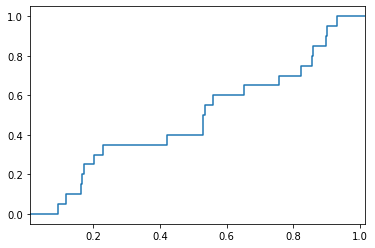

Гистограмма:


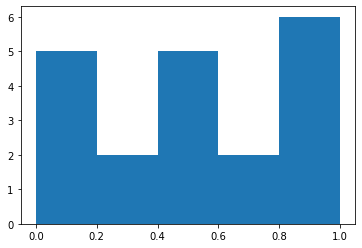

In [33]:
print("Выборка: {}".format(raw_row))
print("Вариационный ряд: {}".format(row))
print("Размах: {}".format(range))
if len(moda) != len(row):
    print("Мода: {}".format(moda))
else:
    print("Мода: не найдена, так как ни одно число не повторяется")
print("Медиана: {}".format(median))
print("Выборочное среднее: {}".format(mean))
print("Дисперсия: {}".format(dispersion))
print("Выборочное среднее квадратичное: {}".format(mean_square))
print("Эмперическая функция:")
plt.plot(emperic_function[:, 0], emperic_function[:, 1])
plt.xlim(low, high)
plt.show()
print("Гистограмма:")
plt.hist(row, bins=m, range=(math.floor(row[0]),math.ceil(row[-1])))
plt.show()